What is a Neuron?

In deep learning, a neuron is just a tiny calculator.

It:

1. takes inputs (numbers)
2.  multiplies each by a weight
3.  adds them together
4. applies an activation function
5. gives an output

Concept:

inputs → [ neuron ] → output


Example:

Input features:

hours studied = 3

sleep hours = 7

Neuron learns weights:
output = (3 × w1) + (7 × w2) + bias


Then applies activation (like ON/OFF, curve, etc.).

A neuron does not think —
it just does repeated math and learns good weights.

***

What does “learning weights” mean?

Learning means:

Changing the weights so predictions become more correct over time.

If the model predicted wrong:

+ adjust w1
+ adjust w2
+ adjust bias b

Next time → prediction becomes a little better.

This happens thousands of times.

##### Who changes the weights?

Weights are changed automatically using:

+ loss function (calculates error)
+ backpropagation (spreads error back)
+ optimizer (updates weights, e.g., SGD, Adam)

You don’t manually change them — training does.

Imagine learning to throw a basketball.

1st throw — too short
You adjust force (like adjusting weights)

Next throw — closer
Keep adjusting until you hit.

Learning weights = learning how hard to throw.

***
Neural networks are composed of layers of interconnected neurons that transform input data through mathematical operations. Understanding layers and activation functions is fundamental to designing and training effective neural networks.

Neural Network Layers
1. Input Layer
Purpose: Receives raw data and passes it to the network.

Characteristics:
+ No computation occurs here
+ Number of neurons equals the number of input features
+ Each neuron represents one feature of the input data

Example: For a 28×28 grayscale image, the input layer has 784 neurons (28 × 28 pixels)

2. Hidden Layers
Purpose: Perform intermediate computations and feature extraction

Characteristics:
+ Can have multiple hidden layers (deep networks)
+ Each layer learns increasingly abstract representations
+ Number of neurons per layer is a hyperparameter

Types:

+ Fully Connected (Dense) Layers: Every neuron connects to all neurons in the previous layer
+ Convolutional Layers: Used in CNNs for spatial feature extraction
+ Recurrent Layers: Used in RNNs for sequential data processing



3. Output Layer

Purpose: Produces the final prediction or classification

Characteristics:

Number of neurons depends on the task:

+ Binary classification: 1 neuron
+ Multi-class classification: Number of classes
+ Regression: 1 or more neurons (depending on output dimensions)

Activation function chosen based on the problem type

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Without them, a neural network would just be a linear transformation, no matter how many layers it has.

Why Non-linearity Matters

Linear combinations of linear functions are still linear. Activation functions enable the network to approximate any continuous function (Universal Approximation Theorem).

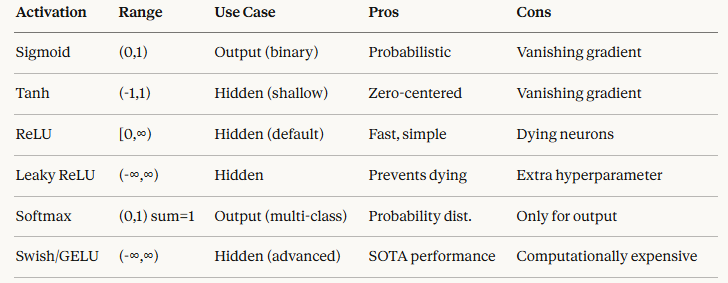

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

C:\Users\LotusBlue\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [29]:
# -----------------------------
# 1. Create dataset
# -----------------------------

# X = [study_hours, sleep_hours]
X = np.array([
    [1, 5],
    [2, 6],
    [1, 4],
    [3, 5],
    [4, 6],
    [5, 5],
    [5, 7],
    [6, 6],
    [7, 5],
    [8, 6],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8],
    [8, 7]
], dtype=float)

# y = 0 (Fail), 1 (Pass)
y = np.array([
    0,0,0,
    0,
    1,1,1,
    1,1,
    0,0,
    1,1,1,1
])

# -----------------------------
# 2. Split into train / test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [31]:
# -----------------------------
# 3. Build ANN model
# -----------------------------
model = Sequential()

# Input layer + Hidden layer (5 neurons)
model.add(Dense(5, input_shape=(2,), activation="relu"))

# Output layer (1 neuron, sigmoid for binary)
model.add(Dense(1, activation="sigmoid"))

# -----------------------------
# 4. Compile model
# -----------------------------
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

C:\Users\LotusBlue\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# -----------------------------
# 5. Train
# -----------------------------
model.fit(X_train, y_train, epochs=200, verbose=0)

# -----------------------------
# 6. Evaluate
# -----------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", acc)

Accuracy: 0.6000000238418579


In [35]:
# -----------------------------
# 7. Make predictions
# -----------------------------
new_students = np.array([
    [2, 7],
    [6, 5],
    [4, 3]
], dtype=float)

pred = model.predict(new_students)
pred_labels = (pred > 0.5).astype(int)

print("\nNew students:")
print(new_students)
print("Probabilities:", pred)
print("Predicted Pass/Fail:", pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

New students:
[[2. 7.]
 [6. 5.]
 [4. 3.]]
Probabilities: [[0.59448534]
 [0.71997344]
 [0.6584033 ]]
Predicted Pass/Fail: [[1]
 [1]
 [1]]


#### What is back propogration?

Feed-Forward is the process where input data passes through the network to produce an output while Backpropagation is the method used to update the network’s weights based on the error between predicted and actual outputs.

Back propagation (or backprop) is the fundamental algorithm that enables neural networks to learn. It's how networks figure out which weights and biases to adjust to reduce prediction errors.

Here's how it works:
The Basic Idea
When a neural network makes a prediction, it calculates an error (how wrong it was). Backpropagation takes this error and works backwards through the network, figuring out how much each weight contributed to that error. It then adjusts the weights to reduce the error next time.

The Process
1. Forward pass: Input data flows through the network, layer by layer, until it produces an output prediction
2. Calculate loss: Compare the prediction to the actual answer using a loss function (like mean squared error)
3. Backward pass: The algorithm calculates gradients (derivatives) of the loss with respect to each weight, starting from the output layer and moving backwards toward the input layer
4. Update weights: Using these gradients, the algorithm adjusts each weight in the direction that reduces the loss (typically using an optimizer like gradient descent)

##### Why It's Called "Back" Propagation
The algorithm uses the chain rule from calculus to propagate the error signal backwards through the network. Each layer's gradients depend on the gradients from the layer after it, so you have to work backwards from output to input.
In Practice
Without backpropagation, we'd have no efficient way to train deep neural networks. Before its popularization in the 1980s, training networks was extremely difficult. Backprop made modern deep learning possible by providing an automated, efficient way to compute all the necessary gradients.

#### What is vanishing gradient problem?

The vanishing gradient problem is a major challenge in training deep neural networks, where gradients become extremely small as they're propagated backwards through many layers, effectively preventing the early layers from learning.

Why It Happens
During backpropagation, gradients are multiplied together as they flow backwards through the network (due to the chain rule). If these multiplied values are less than 1, the gradient shrinks exponentially with each layer. By the time the gradient reaches the early layers, it can become so tiny (approaching zero) that weight updates are negligible.

Main Causes

1. Activation functions: Sigmoid and tanh functions squash their inputs into small ranges (0-1 for sigmoid, -1 to 1 for tanh). Their derivatives are even smaller (max 0.25 for sigmoid), so multiplying many of these small values together causes gradients to vanish
2. Deep architectures: The more layers you have, the more multiplications occur, amplifying the problem
3. Poor weight initialization: Starting with weights that are too small can worsen the issue

Consequences

1. Early layers learn extremely slowly or not at all
2. The network can't capture long-range dependencies
3. Training becomes stuck, with loss plateauing early
4. Only the layers near the output learn effectively

Solutions

1. ReLU activation functions: ReLU (and variants like Leaky ReLU) have a gradient of 1 for positive inputs, avoiding the shrinking effect
2. Residual connections (ResNets): Skip connections allow gradients to flow directly through the network
3. Better initialization: Methods like Xavier or He initialization
4. Batch normalization: Normalizes layer inputs to maintain stable gradients
5. LSTM/GRU: For recurrent networks, these architectures have gating mechanisms that help preserve gradients

The opposite problem, exploding gradients, can also occur when gradients grow exponentially large, though this is typically easier to address with gradient clipping.

#### Epochs in Deep Learning
An epoch is one complete pass through the entire training dataset during the training process.

How It Works
If you have a dataset with 1,000 training examples:

+ 1 epoch = the model has seen all 1,000 examples once
+ 10 epochs = the model has seen all 1,000 examples 10 times

Why Multiple Epochs?

Neural networks rarely learn everything they need from seeing the data just once. By training for multiple epochs, the model:

1. Gradually adjusts its weights to better fit the data
2. Learns more complex patterns
3. Reduces the loss function over time